In [149]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [150]:
file_path = "E:\COMPUTER SCIENCE\CSV Files\Smoking Mini Project\insurance.csv"
data = pd.read_csv(file_path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [151]:
data.shape

(1338, 7)

In [152]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
#Is he smoker or not?
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
#Zone 
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [154]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

[[ True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]]
         


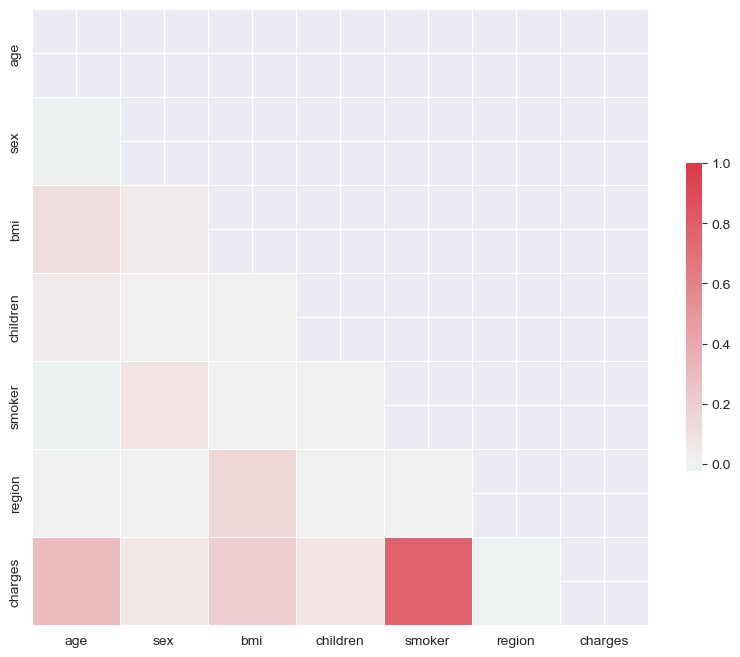

In [155]:
f, ax = plt.subplots(figsize = (10,8))
corr = data.corr()
mask= np.triu(np.ones_like(corr, dtype=bool)) 
print(mask)
print("         ")
cmap = sns.diverging_palette(210, 10, as_cmap = True)
print(cmap)
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=1,center=0,
           square = True, linewidths=.5, cbar_kws = {'shrink':.5},
            annot=True, fmt=".2f", ax=ax)
plt.show()

Text(0.5, 1.0, 'Distribution chargess of non-smokers')

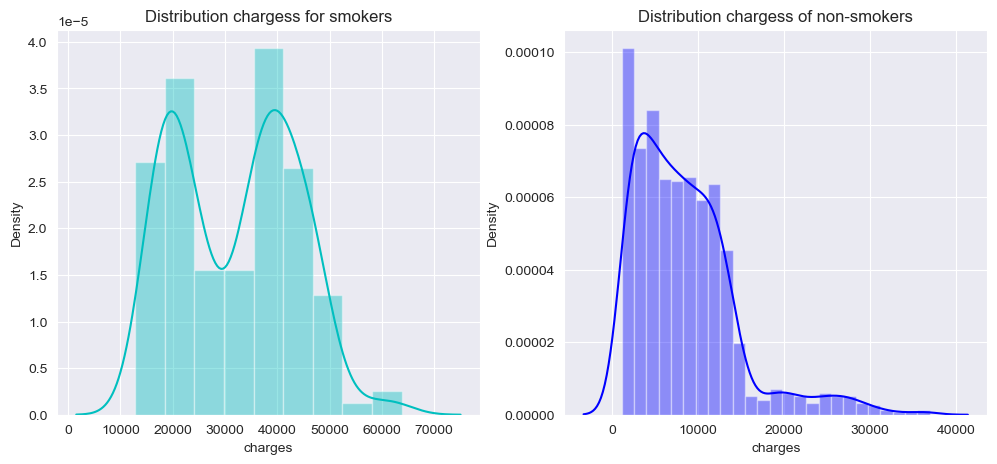

In [156]:
f = plt.figure(figsize = (12,5))
ax = f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]['charges'], color ='c', ax = ax)
ax.set_title("Distribution chargess for smokers")
ax = f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'], color ='b', ax = ax)
ax.set_title("Distribution chargess of non-smokers")

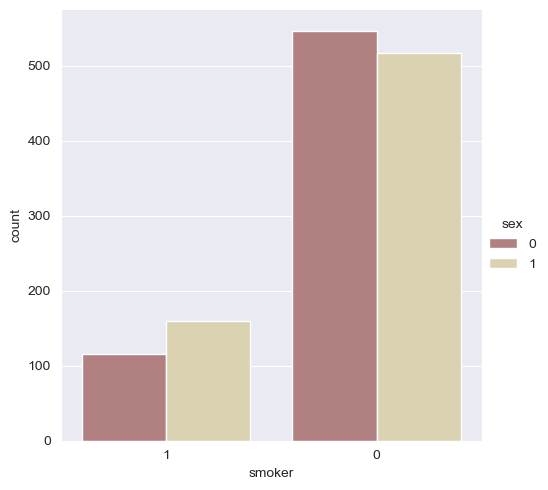

In [157]:
data['smoker'] = data['smoker'].astype(str)
data['sex'] = data['sex'].astype(str)
sns.catplot(x= 'smoker', kind='count',  hue='sex', palette = 'pink',
           data = data)
plt.show()

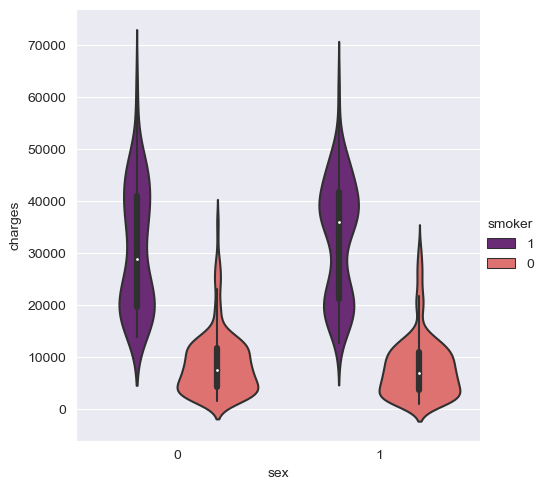

In [158]:
sns.catplot(x='sex', y='charges', hue='smoker',
           kind='violin', data=data, palette='magma')

   age  sex     bmi  children smoker  region      charges
1   18    1  33.770         1      0       2   1725.55230
2   28    1  33.000         3      0       2   4449.46200
3   33    1  22.705         0      0       1  21984.47061
              
Length: 676


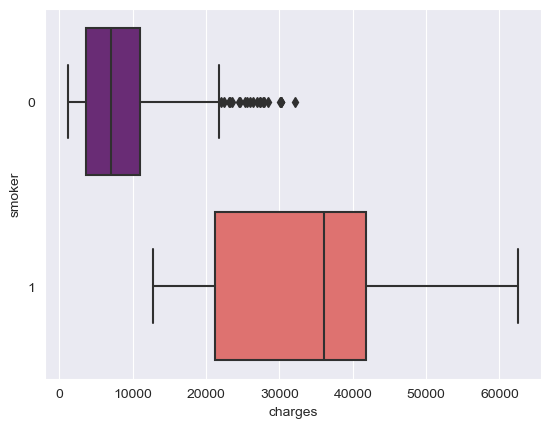

In [159]:
data['sex'] = data['sex'].astype(int)
subset = data[data['sex'] == 1]
print(subset.head(3))
print("              ")
print(f"Length: {len(subset)}")

if not subset.empty:
    sns.boxplot(y= 'smoker', x='charges', data= data[(data.sex == 1)], 
            orient = 'h', palette = 'magma')
    plt.show()
else:
    print("Empty")

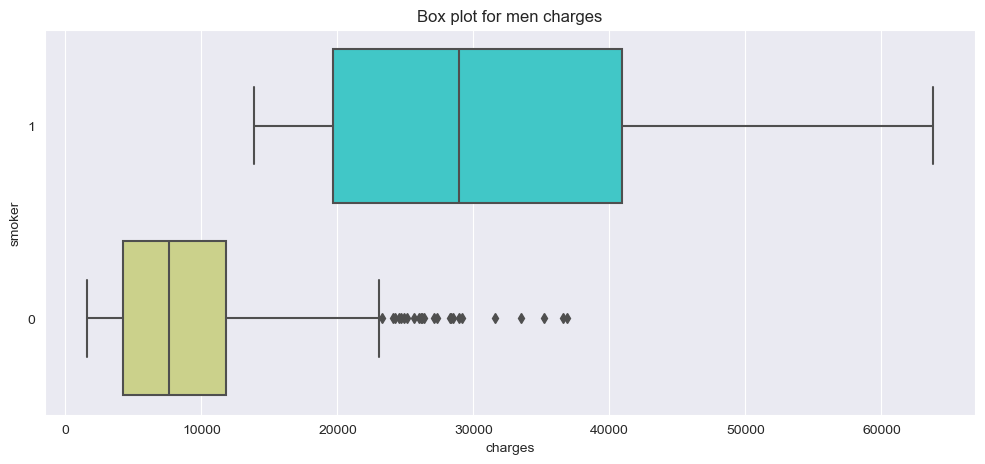

In [160]:
plt.figure(figsize= (12,5))
plt.title("Box plot for men charges")
sns.boxplot(y= 'smoker', x='charges', data= data[(data.sex == 0)], 
            orient = 'h', palette = 'rainbow')
plt.show()

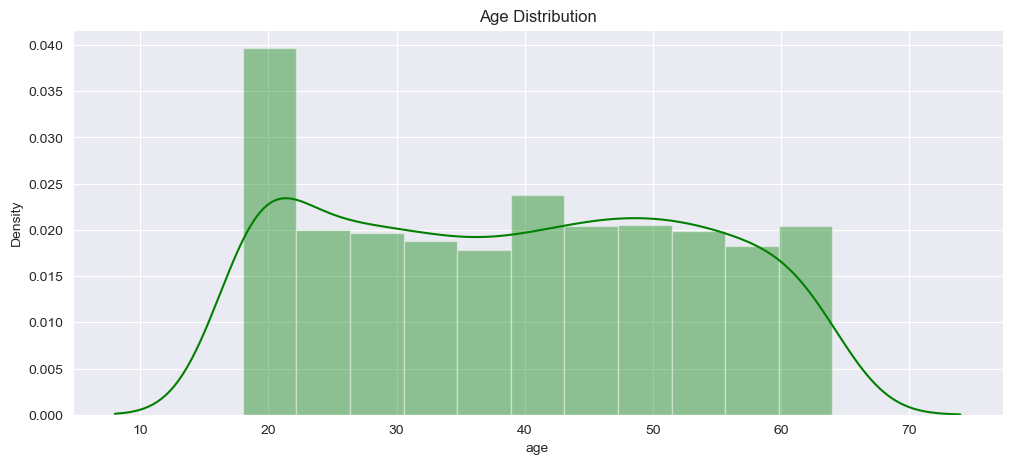

In [161]:
#age distribution for smokers
plt.figure(figsize= (12,5))
plt.title("Age Distribution")
ax = sns.distplot(data['age'], color='g')
plt.show()

    age sex     bmi  children smoker  region     charges
1    18   1  33.770         1      0       2  1725.55230
22   18   1  34.100         0      0       2  1137.01100
31   18   0  26.315         0      0       0  2198.18985
           
Length: 69


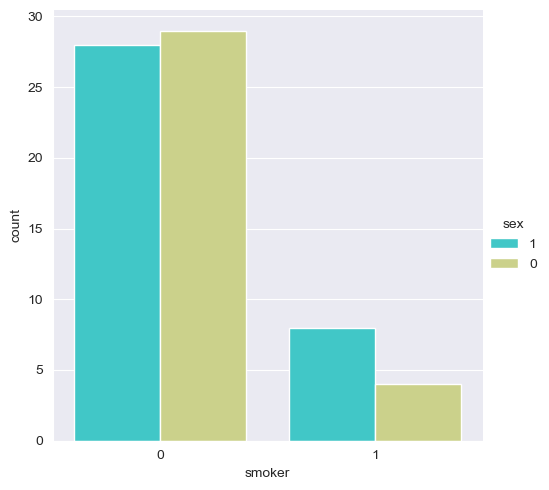

In [162]:
#18 years smokers & non-smokers
data['smoker'] = data['smoker'].astype(str)
data['sex'] = data['sex'].astype(str)

subset = data[data['age'] == 18]
print(subset.head(3))
print("           ")
print(f"Length: {len(subset)}")

if not subset.empty:
    sns.catplot(x='smoker', kind='count', hue='sex', 
                palette= 'rainbow',data = subset)
    plt.show()
else:
    print("Empty")

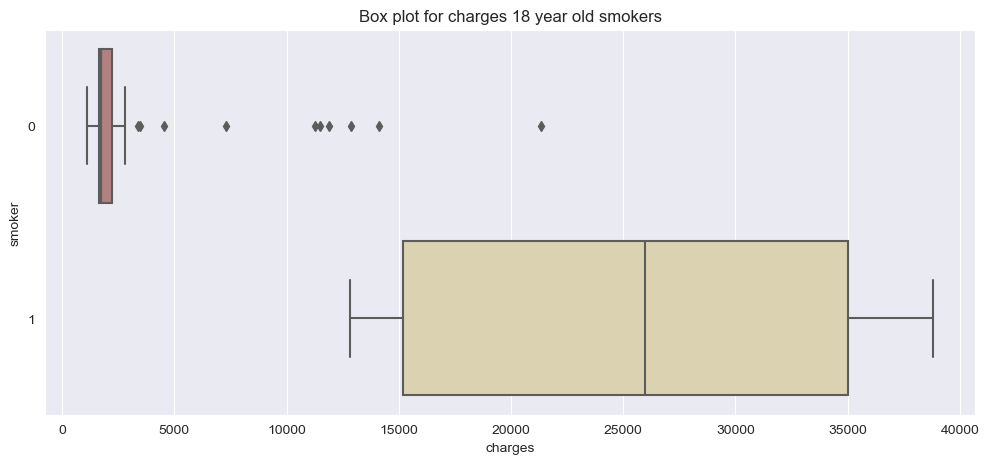

In [163]:
plt.figure(figsize= (12,5))
plt.title("Box plot for charges 18 year old smokers")
sns.boxplot(y= 'smoker', x='charges', data = data[(data.age == 18)],
           orient = 'h', palette= 'pink')
plt.show()

Text(0.5, 1.0, 'Smokers & Non-Smokers')

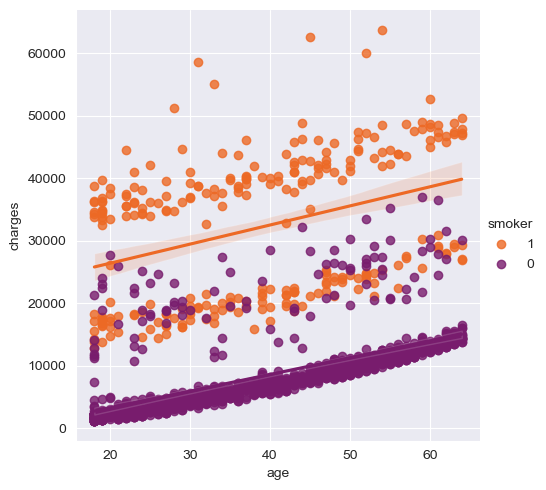

In [164]:
sns.lmplot(x='age', y='charges', hue='smoker', data=data, 
           palette = 'inferno_r')  #size=7
ax.set_title("Smokers & Non-Smokers")

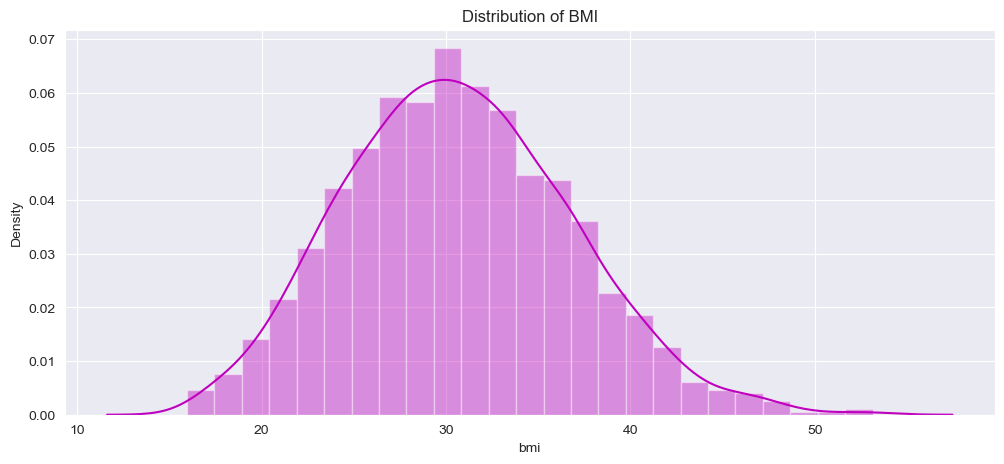

In [165]:
#BMI distribution
plt.figure(figsize = (12,5))
plt.title("Distribution of BMI")
ax = sns.distplot(data['bmi'], color = 'm')
plt.show()

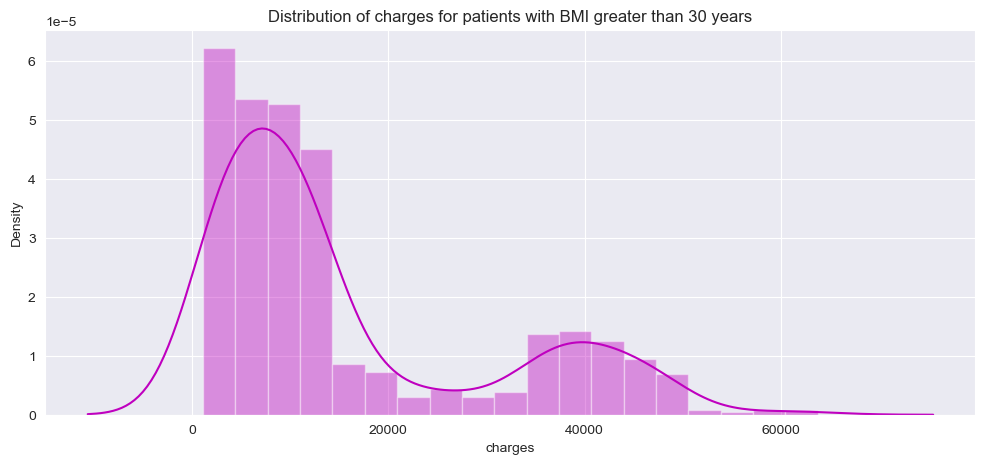

In [166]:
#Distribution of charges for patients with BMI greater than 30 years
plt.figure(figsize = (12,5))
plt.title("Distribution of charges for patients with BMI greater than 30 years")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')
plt.show()

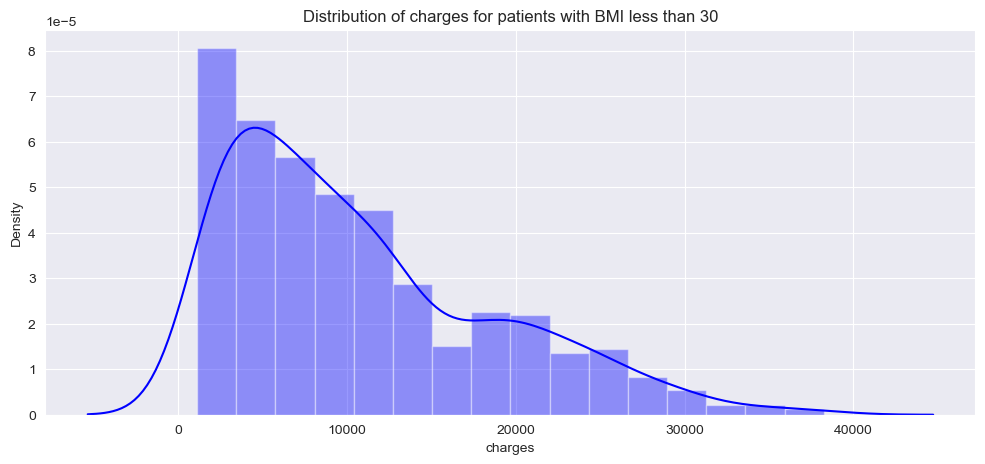

In [167]:
plt.figure(figsize = (12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')
plt.show()

Text(0.5, 1.0, 'Distribution of BMI and Charges')

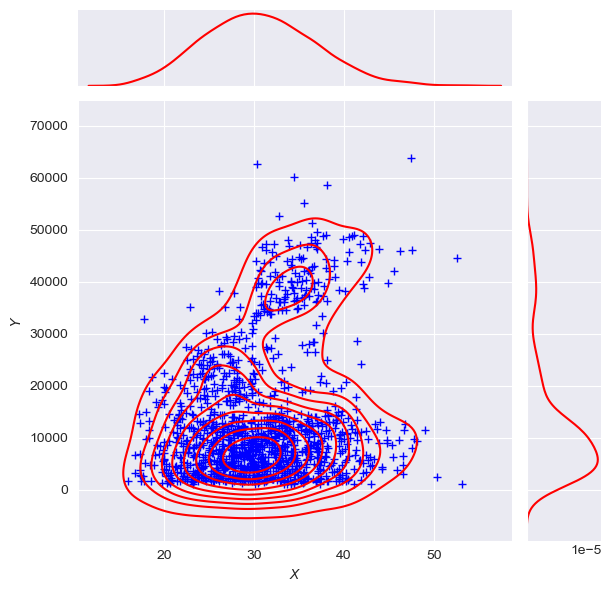

In [168]:
g = sns.jointplot(x='bmi', y='charges', data= data, kind = 'kde', 
                  color='r')
g.plot_joint(plt.scatter, c='b', s=30, linewidth=1, marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title("Distribution of BMI and Charges")

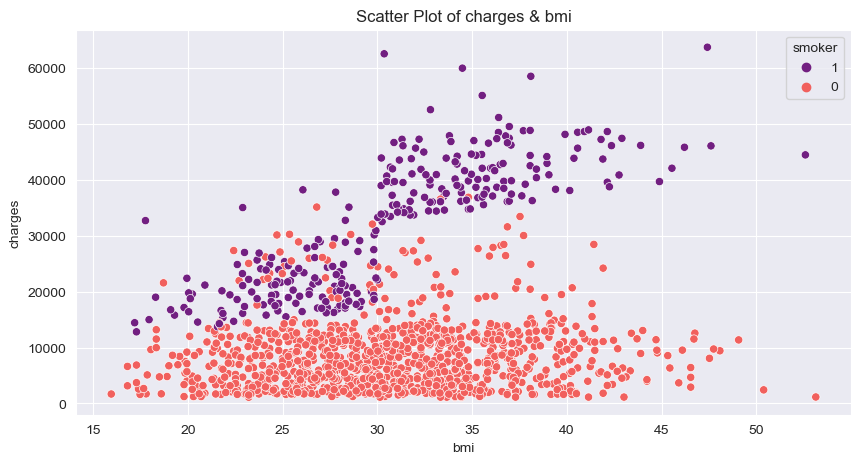

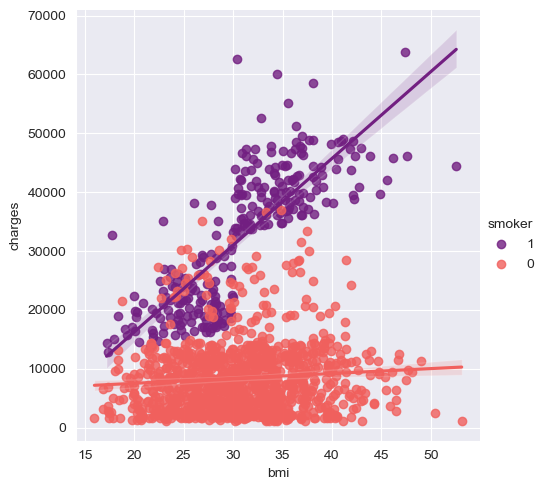

In [169]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='bmi', y='charges', data=data, 
                     palette = 'magma', hue='smoker')
ax.set_title("Scatter Plot of charges & bmi")
sns.lmplot(x='bmi', y='charges', hue='smoker', data=data, 
          palette= 'magma')
plt.show()

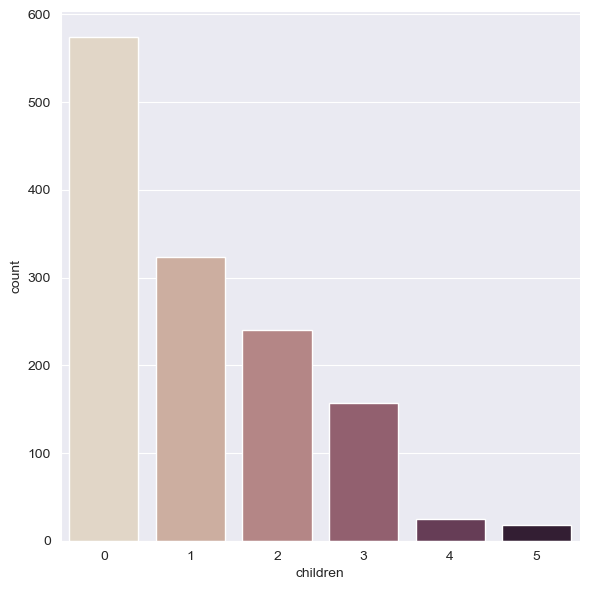

In [170]:
sns.catplot(x='children', kind='count', palette="ch:.25",
           data=data, height=6)

Unique values in 'smoker':  ['1' '0']
Unique values in 'children':  [0 1 3 2 5 4]
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region        int32
charges     float64
dtype: object


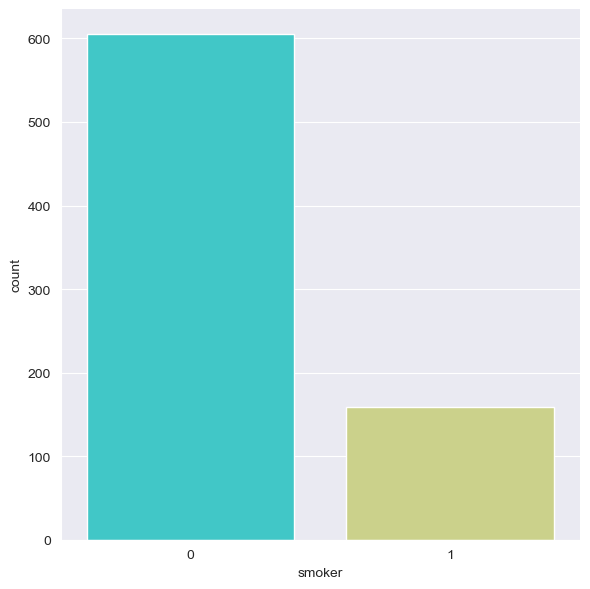

In [171]:
print("Unique values in 'smoker': ", data['smoker'].unique())
print("Unique values in 'children': ", data['children'].unique())

print(data.dtypes)

sns.catplot(x= 'smoker', kind='count', palette= 'rainbow',
           data = data[data['children'] > 0], height = 6)
ax.set_title("Smokers & Non-Smokers who have children")
plt.show()

In [172]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [173]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)
lr = LinearRegression().fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test, y_test))

0.7962732059725786


In [174]:
x = data.drop(['charges', 'region'], axis=1)
y = data.charges

quad = PolynomialFeatures(degree = 2)
x_quad = quad.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_quad, y, random_state = 0)

plr = LinearRegression().fit(x_train, y_train)
y_train_pred = plr.predict(x_train)
y_test_pred = plr.predict(x_test)

print(plr.score(x_test, y_test))
#print(x_train)
#print(y_train)

0.8849197344147238


In [175]:
"""Our model predicts well the cost of treatment of patients. 
I think we could limit ourselves to creating two or three
polynomial features, but the data set is so small, so we went 
the easy way. And finally try RandomForestRegressor. 
I've never used this algorithm in regression analysis.
"""

"Our model predicts well the cost of treatment of patients. \nI think we could limit ourselves to creating two or three\npolynomial features, but the data set is so small, so we went \nthe easy way. And finally try RandomForestRegressor. \nI've never used this algorithm in regression analysis.\n"

In [176]:
forest = RandomForestRegressor(n_estimators=100, criterion = 'poisson',
                              random_state = 1,
                              n_jobs=-1)

forest.fit(x_train, y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print("MSE train data: %.3f, MSE test data: %.3f" %(
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print("R2 train data: %.3f, R2 test data: %.3f" %(
r2_score(y_train, forest_train_pred),
r2_score(y_test, forest_test_pred)))

MSE train data: 3952265.673, MSE test data: 20601466.849
R2 train data: 0.972, R2 test data: 0.869


Length of forest_train_pred: 1003
Length of y_train 1003
       
       
Length of forest_train_pred: 1003
Length of y_test 335


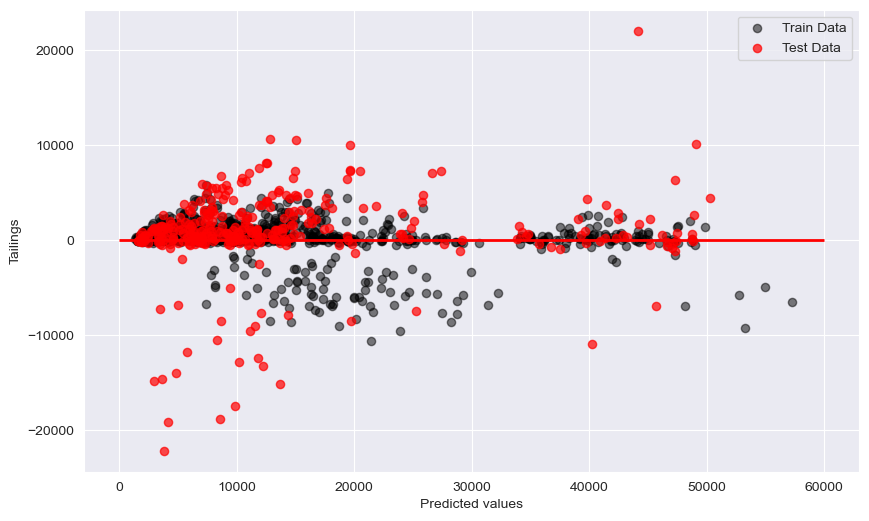

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

plt.figure(figsize = (10,6))

print("Length of forest_train_pred:",len(forest_train_pred))
print("Length of y_train", len(y_train))
print("       ")
print("       ")

#Ensure the arrays are the same length
assert len(forest_train_pred) == len(y_train), "Predicted & actual values must be of same length." 
plt.scatter(forest_train_pred, [pred - actual for pred, actual in zip(forest_train_pred, y_train)],
           c='black', marker='o', s=35, alpha=0.5, label = 'Train Data')

print("Length of forest_train_pred:",len(forest_train_pred))
print("Length of y_test", len(y_test))

#Ensure the arrays are the same length
assert len(forest_test_pred) == len(y_test), "1_Predicted & actual values must be of same length." 

residuals = [pred-actual for pred, actual in zip(forest_test_pred, y_test)]

plt.scatter(forest_test_pred, residuals,
           c='r', marker='o', s=35, alpha=0.7, label = 'Test Data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc ='upper right')
plt.hlines(y=0, xmin=0, xmax=60_000, lw=2, color='red')
plt.show()

In [178]:
#Data Visualization & pre-processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#regression models
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#for hypertuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

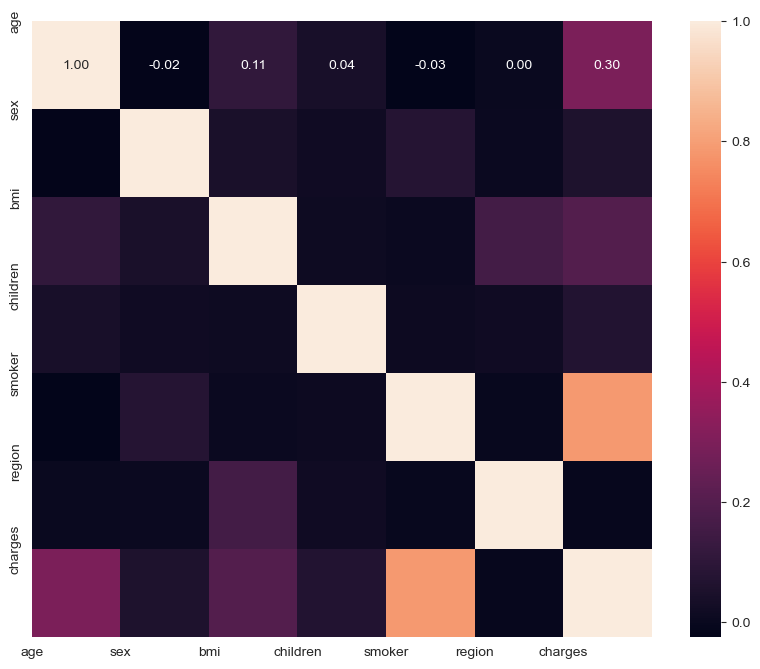

In [179]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr,annot=True, fmt=".2f")#cmap='coolwarm',
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

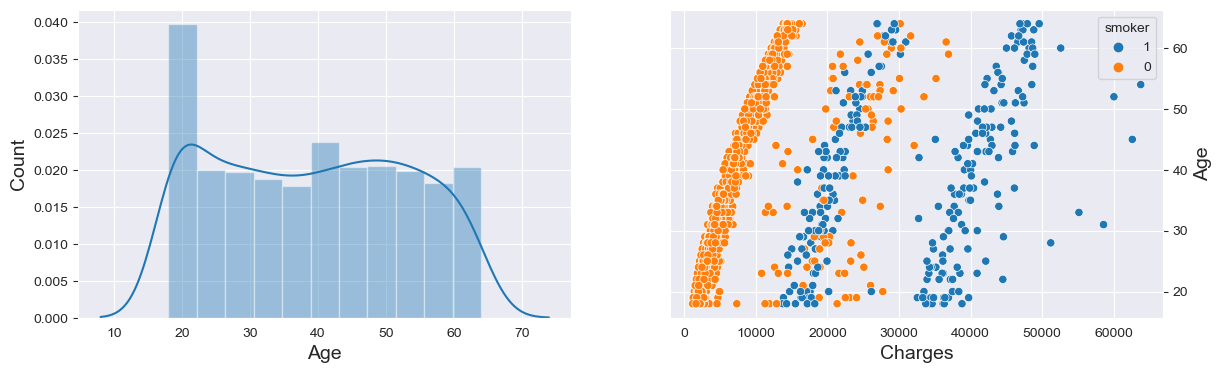

In [180]:
#Age VS Count
f, axes = plt.subplots(1,2, figsize = (14,4))
sns.distplot(data['age'], ax = axes[0])
axes[0].set_xlabel('Age', fontsize = 14)
axes[0].set_ylabel('Count', fontsize = 14)
axes[0].yaxis.tick_left()

#Age VS CHarges
sns.scatterplot(x = 'charges', y = 'age', data = data, 
                hue = 'smoker', ax = axes[1])
axes[1].set_xlabel('Charges', fontsize = 14)
axes[1].set_ylabel('Age', fontsize = 14)
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

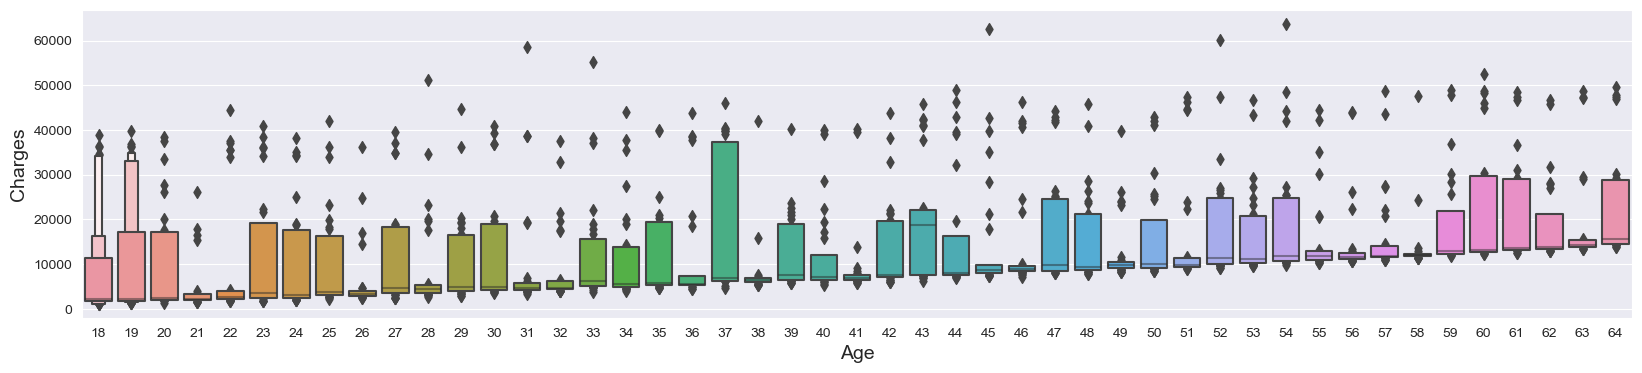

In [181]:
#Age VS Charges
f,axes = plt.subplots(1,1,figsize = (20,4))
sns.boxenplot(x='age', y='charges', data=data, ax=axes)
axes.set_xlabel("Age",  fontsize=14)
axes.set_ylabel("Charges",  fontsize=14)
plt.show()

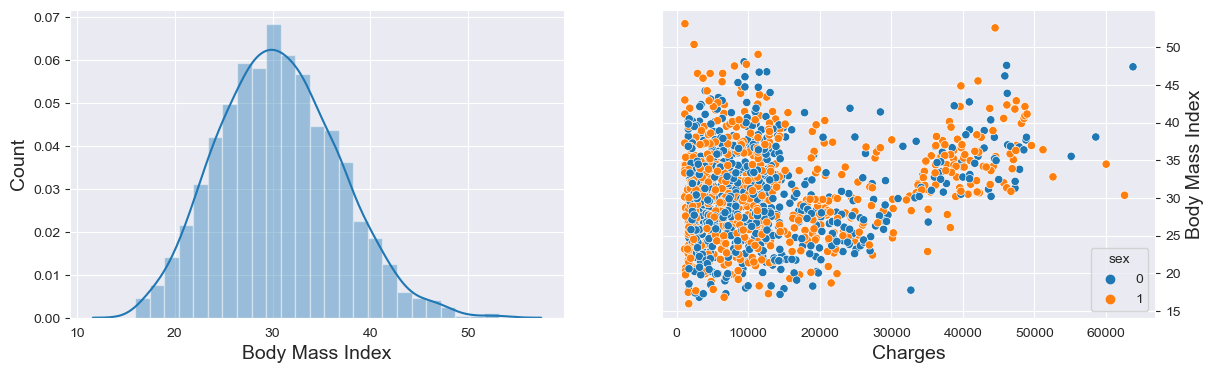

In [182]:
#BMI VS Count & Charges VS BMI
f, axes = plt.subplots(1,2, figsize = (14,4))
sns.distplot(data['bmi'], ax = axes[0])
axes[0].set_xlabel('Body Mass Index', fontsize = 14)
axes[0].set_ylabel('Count', fontsize = 14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'charges', y = 'bmi', data = data, 
                hue = 'sex', ax = axes[1])
axes[1].set_xlabel('Charges', fontsize = 14)
axes[1].set_ylabel('Body Mass Index', fontsize = 14)
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

In [183]:
data = pd.get_dummies(data)
data.head(5)

,age,bmi,children,region,charges,sex_0,sex_1,smoker_0,smoker_1
0,19,27.900,0,3,16884.92400,True,False,False,True
1,18,33.770,1,2,1725.55230,False,True,True,False
2,28,33.000,3,2,4449.46200,False,True,True,False
3,33,22.705,0,1,21984.47061,False,True,True,False
4,32,28.880,0,1,3866.85520,False,True,True,False


In [184]:
x = data.drop('charges', axis = 1).values
y = data['charges'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,
                                                   random_state=42)

In [185]:
print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of Y_test: ", y_test.shape)

Shape of X_train:  (1003, 8)
Shape of X_test:  (335, 8)
Shape of Y_train:  (1003, 1)
Shape of Y_test:  (335, 1)


In [186]:
#Basic Linear Regression MOdel
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train)

LinearRegression()

In [187]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming regressor_linear, x, y, x_train, x_test, y_train, y_test are defined

cv_linear = cross_val_score(estimator=regressor_linear, X=x, y=y, cv=10)
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print("CV: ", cv_linear.mean())
print("R2_Score (train): ", r2_score_linear_train)
print("R2_Score (test): ", r2_score_linear_test)
print("RMSE: ", rmse_linear)



"""cv_linear = cross_val_score(estimator = regressor_linear, x= x, 
                            y=y,cv=10)
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_train)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print("R2_Score (train): ", r2_score_linear_train)
print("R2_Score (test): ", r2_score_linear_test)
print("RMSE: ", rmse_linear)"""

CV:  0.7448047213193172
R2_Score (train):  0.7449087316606229
R2_Score (test):  0.7668905583460908
RMSE:  5930.779824530081


'cv_linear = cross_val_score(estimator = regressor_linear, x= x, \n                            y=y,cv=10)\ny_pred_linear_train = regressor_linear.predict(x_train)\nr2_score_linear_train = r2_score(y_train, y_pred_linear_train)\n\ny_pred_linear_test = regressor_linear.predict(x_test)\nr2_score_linear_test = r2_score(y_test, y_pred_linear_train)\n\nrmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))\nprint("CV: ", cv_linear.mean())\nprint("R2_Score (train): ", r2_score_linear_train)\nprint("R2_Score (test): ", r2_score_linear_test)\nprint("RMSE: ", rmse_linear)'

In [188]:
#Creating Polynomial Features
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
x_train_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train_poly, y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(x_train_poly, y_train)

LinearRegression()

In [189]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming regressor_poly2, x_poly, y, x_train, x_test, y_train, y_test, poly_reg are defined

cv_poly2 = cross_val_score(estimator=regressor_poly2, X=x_poly, y=y, cv=10)

# Train set
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(x_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Test set
y_pred_poly2_test = regressor_poly2.predict(poly_reg.transform(x_test))  # Corrected
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_poly2_test))

print("CV: ", cv_poly2.mean())
print("R2_Score (train): ", r2_score_poly2_train)
print("R2_Score (test): ", r2_score_poly2_test)
print("RMSE: ", rmse_poly2)


"""cv_poly2 = cross_val_score(estimator = regressor_poly2, x=x_poly, y=y,
                          cv=10)
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(x_test))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

y_pred_poly2_test = regressor_ppoly2.predict(poly_reg.fir_transform(x_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print("CV: ", cv_poly2.mean())
print("R2_Score (train): ", r2_score_poly2_train)
print("R2_Score (test): ", r2_score_poly2_test)
print("RMSE: ", rmse_poly2)"""

CV:  0.8023253786886814
R2_Score (train):  0.8410828400485024
R2_Score (test):  0.8553305394366234
RMSE:  4672.18790127842


'cv_poly2 = cross_val_score(estimator = regressor_poly2, x=x_poly, y=y,\n                          cv=10)\ny_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(x_test))\nr2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)\n\ny_pred_poly2_test = regressor_ppoly2.predict(poly_reg.fir_transform(x_test))\nr2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)\n\nrmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))\nprint("CV: ", cv_poly2.mean())\nprint("R2_Score (train): ", r2_score_poly2_train)\nprint("R2_Score (test): ", r2_score_poly2_test)\nprint("RMSE: ", rmse_poly2)'

In [190]:
#Ridge Regression
steps = [
    ('scalar' ,StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming ridge_pipe, x, y are defined

# Define the pipeline with StandardScaler and Ridge
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

# Parameters for GridSearchCV
parameters = {
    'model__alpha': [43],
    'model__fit_intercept': [True],
    'model__tol': [0.0001],
    'model__solver': ['auto'],
    'model__random_state': [42],
}

# Create GridSearchCV object
regressor_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
regressor_ridge.fit(x, y.ravel())  # Fit the GridSearchCV object

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [43], 'model__fit_intercept': [True],
                         'model__random_state': [42], 'model__solver': ['auto'],
                         'model__tol': [0.0001]})

In [192]:
print(regressor_ridge.best_score_)
print(regressor_ridge.best_params_)

0.7447373391048133
{'model__alpha': 43, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [193]:
#predict cross validation score the test set values
cv_ridge = regressor_ridge.best_score_
# Predicting R2 Score the Test set resultsx
y_pred_ridge_train = regressor_ridge.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)
# Predicting R2 Score the Test set results
y_pred_ridge_test = regressor_ridge.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)
# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.7447373391048133
R2_score (train):  0.7445929691175901
R2_score (test):  0.7673696503055494
RMSE:  5924.682151412602


In [194]:
#LASSO REGRESSION
steps = [
 ('scalar', StandardScaler()),
 ('poly', PolynomialFeatures(degree=2)),
 ('model', Lasso())
]
lasso_pipe = Pipeline(steps)

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming lasso_pipe, X, y are defined

# Define the pipeline with StandardScaler and Lasso
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

# Parameters for GridSearchCV
parameters = {
    'model__alpha': [0.9949],
    'model__fit_intercept': [True],
    'model__tol': [0.0001],
    'model__max_iter': [5000],
    'model__random_state': [42]
}

# Create GridSearchCV object
regressor_lasso = GridSearchCV(lasso_pipe, parameters, 
                               cv=10, n_jobs=-1, verbose=4)
regressor_lasso.fit(x, y.ravel())  # Fit the GridSearchCV object

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.9949],
                         'model__fit_intercept': [True],
                         'model__max_iter': [5000], 'model__random_state': [42],
                         'model__tol': [0.0001]},
             verbose=4)

In [196]:
# Predicting Cross Validation Score
cv_lasso = regressor_lasso.best_score_
# Predicting R2 Score the Test set results
y_pred_lasso_train = regressor_lasso.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
# Predicting R2 Score the Test set results
y_pred_lasso_test = regressor_lasso.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)
# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.7448084519347613
R2_score (train):  0.7447450250720844
R2_score (test):  0.7679879719871748
RMSE:  5916.803134465652


In [197]:
#SUPPORT VECTOR REGRESSION MODEL
# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(x)
y_scaled = sc_y.fit_transform(y.reshape(-1,1))

In [198]:
# Creating the SVR regressor
regressor_svr = SVR()

In [199]:
# Applying Grid Search to find the best model and the best parameters
parameters = { 'kernel' : ['rbf', 'sigmoid'],
 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
 'tol' : [0.0001],
 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
regressor_svr = GridSearchCV(estimator = regressor_svr,
 param_grid = parameters, cv = 10, verbose = 4, n_jobs = -1)
regressor_svr = regressor_svr.fit(X_scaled, y_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


In [200]:
print(regressor_svr.best_params_)
print(regressor_svr.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'tol': 0.0001}
0.8434767638204216


In [201]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming regressor_svr, sc_X, sc_y, x_train, x_test, y_train, y_test are defined

# Ensure y_train is 1-dimensional
if y_train.ndim > 1:
    y_train = y_train.ravel()

# Transform x_train and x_test using the scaler
x_train_transformed = sc_X.transform(x_train)  # Ensure x_train is transformed
x_test_transformed = sc_X.transform(x_test)    # Ensure x_test is transformed

# Predicting Cross Validation Score
cv_svr = regressor_svr.best_score_

# Predicting R2 Score for the Train set
y_pred_svr_train = regressor_svr.predict(x_train_transformed)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score for the Test set
y_pred_svr_test = regressor_svr.predict(x_test_transformed)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE for the Test set
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr_test))

print('CV Score: ', cv_svr)
print('R2 Score (train): ', r2_score_svr_train)
print('R2 Score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV Score:  0.8434767638204216
R2 Score (train):  -1.2131675890380098
R2 Score (test):  -1.1682686297088813
RMSE:  18087.911010462973


In [202]:
#DECISION TREE REGRESSION
# Creating the Decision Tree regressor
regressor_dt = DecisionTreeRegressor(random_state = 42)

In [203]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define your Decision Tree Regressor
regressor_dt = DecisionTreeRegressor()

# Define the parameter grid for GridSearchCV
parameters = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 10, 50],
    'min_samples_split': [2, 5, 10],
    'criterion': ['friedman_mse', 'poisson'],  # Reduced number of criteria
    'random_state': [42]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=regressor_dt,
                              param_grid=parameters,
                              cv=10,
                              verbose=4,
                              n_jobs=-1,
                              error_score='raise')  # Set error_score='raise'

try:
    # Fit GridSearchCV on your data
    grid_search_dt.fit(x_train, y_train)
    
    # Print the best parameters found by GridSearchCV
    print("Best parameters found: ", grid_search_dt.best_params_)
    
    # Print the best CV score found by GridSearchCV
    print("Best CV score: ", grid_search_dt.best_score_)

except Exception as e:
    print("Error during fitting:", e)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}
Best CV score:  0.842273558762144


In [204]:
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}
0.842273558762144


In [205]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define your Decision Tree Regressor
regressor_dt = DecisionTreeRegressor()

# Define the parameter grid for GridSearchCV
parameters = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 10, 50],
    'min_samples_split': [2, 5, 10],
    'criterion': ['friedman_mse', 'poisson'],
    'random_state': [42]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=regressor_dt,
                              param_grid=parameters,
                              cv=10,
                              verbose=4,
                              n_jobs=-1,
                              error_score='raise')

try:
    # Fit GridSearchCV on your data
    grid_search_dt.fit(x_train, y_train)
    
    # Print the best parameters found by GridSearchCV
    #print("Best parameters found: ", grid_search_dt.best_params_)
    
    # Print the best CV score found by GridSearchCV
    print("Best CV score: ", grid_search_dt.best_score_)

except Exception as e:
    print("Error during fitting:", e)

# Predicting Cross Validation Score
cv_dt = grid_search_dt.best_score_
print("Best cross-validation score:", cv_dt)

# Using the best fitted model for predictions
best_model = grid_search_dt.best_estimator_

# Reshape if necessary
if len(x_train.shape) == 1:
    x_train = x_train.reshape(-1, 1)
if len(x_test.shape) == 1:
    x_test = x_test.reshape(-1, 1)
if len(y_train.shape) == 1:
    y_train = y_train.reshape(-1, 1)
if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)

# Ensure the scaler is fitted
sc_X.fit(x_train)
sc_y.fit(y_train)

# Predicting R2 Score for the Train set results
y_pred_dt_train = sc_y.inverse_transform(best_model.predict(sc_X.transform(x_train)).reshape(-1, 1))
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score for the Test set results
y_pred_dt_test = sc_y.inverse_transform(best_model.predict(sc_X.transform(x_test)).reshape(-1, 1))
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE for the Test set results
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))

print('CV: ', cv_dt)
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best CV score:  0.842273558762144
Best cross-validation score: 0.842273558762144
CV:  0.842273558762144
R2_score (train):  -57963954.91005516
R2_score (test):  -55331799.62757614
RMSE:  91373291.82316191


In [206]:
#RANDOM FOREST TREE
regressor_rf = RandomForestRegressor()

In [207]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
parameters = {
    "n_estimators": [1200],
    "max_features": ["auto"],
    "max_depth": [50],
    "min_samples_split": [7],
    "min_samples_leaf": [10],
    "bootstrap": [True],
    "criterion": ["squared_error"],  # Correct parameter name for criterion
    "random_state": [42]
}

# Define your RandomForest Regressor
regressor_rf = RandomForestRegressor()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=regressor_rf,
                              param_grid=parameters,
                              cv=10,
                              n_jobs=-1)

# Fit GridSearchCV on your data
grid_search_rf = grid_search_rf.fit(X_scaled, y.ravel())

# Print the best parameters found by GridSearchCV
#print("Best parameters found: ", grid_search_rf.best_params_)

# Print the best CV score found by GridSearchCV
print("Best CV score: ", grid_search_rf.best_score_)

Best CV score:  0.8589424757470754


In [208]:
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

{'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200, 'random_state': 42}
0.8589424757470754


In [209]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Use the best estimator from GridSearchCV for predictions
best_model_rf = grid_search_rf.best_estimator_

# Predicting R2 Score for the Train set results
y_pred_rf_train = best_model_rf.predict(sc_X.transform(x_train))
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score for the Test set results
y_pred_rf_test = best_model_rf.predict(sc_X.transform(x_test))
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE for the Test set results
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

# Print results
print("Best cross-validation score:", grid_search_rf.best_score_)
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

Best cross-validation score: 0.8589424757470754
R2_score (train):  0.887403787154533
R2_score (test):  0.8890031423891781
RMSE:  4092.4860840963397


In [210]:
#ERROR MEASUREMENT
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Linear Regression
regressor_linear = LinearRegression()
grid_search_linear = GridSearchCV(estimator=regressor_linear, 
                                  param_grid={}, cv=10, n_jobs=-1)
grid_search_linear.fit(x_train,y_train)

# Polynomial Regression (2nd degree)
pipeline_poly2 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('lin_reg', LinearRegression())
])
parameters_poly2 = {
    'poly_features__degree': [2],
    'lin_reg__fit_intercept': [True, False]
}
grid_search_poly2 = GridSearchCV(estimator=pipeline_poly2, 
                                 param_grid=parameters_poly2, cv=10, 
                                 n_jobs=-1)
grid_search_poly2.fit(x_train, y_train)

# Ridge Regression
regressor_ridge = Ridge()
parameters_ridge = {'alpha': [0.1, 1.0, 10.0]}
grid_search_ridge = GridSearchCV(estimator=regressor_ridge, 
                                 param_grid=parameters_ridge, cv=10,
                                 n_jobs=-1)
grid_search_ridge.fit(x_train, y_train)

# Lasso Regression
regressor_lasso = Lasso()
parameters_lasso = {'alpha': [0.1, 1.0, 10.0]}
grid_search_lasso = GridSearchCV(estimator=regressor_lasso, 
                                 param_grid=parameters_lasso, cv=10, 
                                 n_jobs=-1)
grid_search_lasso.fit(x_train, y_train)

# Support Vector Regression
regressor_svr = SVR()
parameters_svr = {'C': [1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svr = GridSearchCV(estimator=regressor_svr, 
                               param_grid=parameters_svr, cv=10, 
                               n_jobs=-1)
grid_search_svr.fit(x_train, y_train)

# Decision Tree Regression
regressor_dt = DecisionTreeRegressor()
parameters_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search_dt = GridSearchCV(estimator=regressor_dt, 
                              param_grid=parameters_dt, cv=10, 
                              n_jobs=-1)
grid_search_dt.fit(x_train, y_train)

# Random Forest Regression
regressor_rf = RandomForestRegressor()
parameters_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(estimator=regressor_rf, 
                              param_grid=parameters_rf, cv=10, 
                              n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [211]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming you have already fitted models and have sc_X, sc_y, x_train, x_test, y_train, y_test defined

# Transform x_train and x_test using the scaler
x_train_transformed = sc_X.transform(x_train)
x_test_transformed = sc_X.transform(x_test)

# Predictions and metrics for each model
rmse_linear = np.sqrt(mean_squared_error(y_test, grid_search_linear.predict(x_test_transformed)))
r2_score_linear_train = r2_score(y_train, grid_search_linear.predict(x_train_transformed))
r2_score_linear_test = r2_score(y_test, grid_search_linear.predict(x_test_transformed))

rmse_poly2 = np.sqrt(mean_squared_error(y_test, grid_search_poly2.predict(x_test_transformed)))
r2_score_poly2_train = r2_score(y_train, grid_search_poly2.predict(x_train_transformed))
r2_score_poly2_test = r2_score(y_test, grid_search_poly2.predict(x_test_transformed))

rmse_ridge = np.sqrt(mean_squared_error(y_test, grid_search_ridge.predict(x_test_transformed)))
r2_score_ridge_train = r2_score(y_train, grid_search_ridge.predict(x_train_transformed))
r2_score_ridge_test = r2_score(y_test, grid_search_ridge.predict(x_test_transformed))

rmse_lasso = np.sqrt(mean_squared_error(y_test, grid_search_lasso.predict(x_test_transformed)))
r2_score_lasso_train = r2_score(y_train, grid_search_lasso.predict(x_train_transformed))
r2_score_lasso_test = r2_score(y_test, grid_search_lasso.predict(x_test_transformed))

rmse_svr = np.sqrt(mean_squared_error(y_test, grid_search_svr.predict(x_test_transformed)))
r2_score_svr_train = r2_score(y_train, grid_search_svr.predict(x_train_transformed))
r2_score_svr_test = r2_score(y_test, grid_search_svr.predict(x_test_transformed))

rmse_dt = np.sqrt(mean_squared_error(y_test, grid_search_dt.predict(x_test_transformed)))
r2_score_dt_train = r2_score(y_train, grid_search_dt.predict(x_train_transformed))
r2_score_dt_test = r2_score(y_test, grid_search_dt.predict(x_test_transformed))

rmse_rf = np.sqrt(mean_squared_error(y_test, grid_search_rf.predict(x_test_transformed)))
r2_score_rf_train = r2_score(y_train, grid_search_rf.predict(x_train_transformed))
r2_score_rf_test = r2_score(y_test, grid_search_rf.predict(x_test_transformed))

# List of models and their metrics
models = [
    ('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, grid_search_linear.best_score_),
    ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, grid_search_poly2.best_score_),
    ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, grid_search_ridge.best_score_),
    ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, grid_search_lasso.best_score_),
    ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, grid_search_svr.best_score_),
    ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, grid_search_dt.best_score_),
    ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, grid_search_rf.best_score_)
]

# Create a DataFrame to display the metrics
predict = pd.DataFrame(data=models, 
                       columns=['Model', 'RMSE', 'R2_Score(training)',
                                'R2_Score(test)', 'Cross-Validation'])

print(predict)


                         Model          RMSE  R2_Score(training)  \
0            Linear Regression  2.057779e+04       -2.019536e+00   
1  Polynomial Regression (2nd)  8.805607e+12       -5.389804e+17   
2             Ridge Regression  2.054263e+04       -2.008949e+00   
3             Lasso Regression  1.541813e+04       -7.637935e-01   
4    Support Vector Regression  1.724362e+04       -1.019078e+00   
5     Decision Tree Regression  1.213657e+04       -2.357520e-04   
6     Random Forest Regression  1.187061e+04        3.688748e-02   

   R2_Score(test)  Cross-Validation  
0   -1.806297e+00          0.732992  
1   -5.138719e+17          0.826951  
2   -1.796717e+00          0.733032  
3   -5.754329e-01          0.733159  
4   -9.705764e-01          0.077181  
5    2.382339e-02          0.835108  
6    6.613926e-02          0.832551  


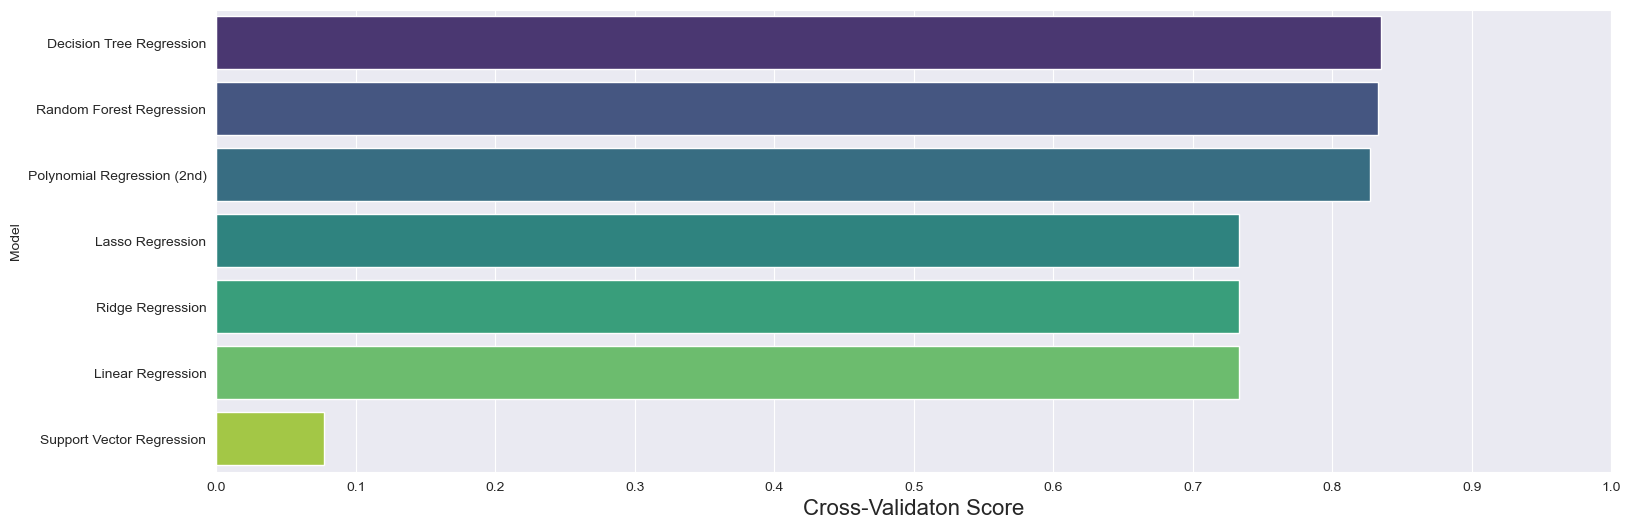

In [212]:
#The best interms of CVS? Random forest Tree
f, axe = plt.subplots(1,1, figsize=(18,6))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)
sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe, palette='viridis')
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

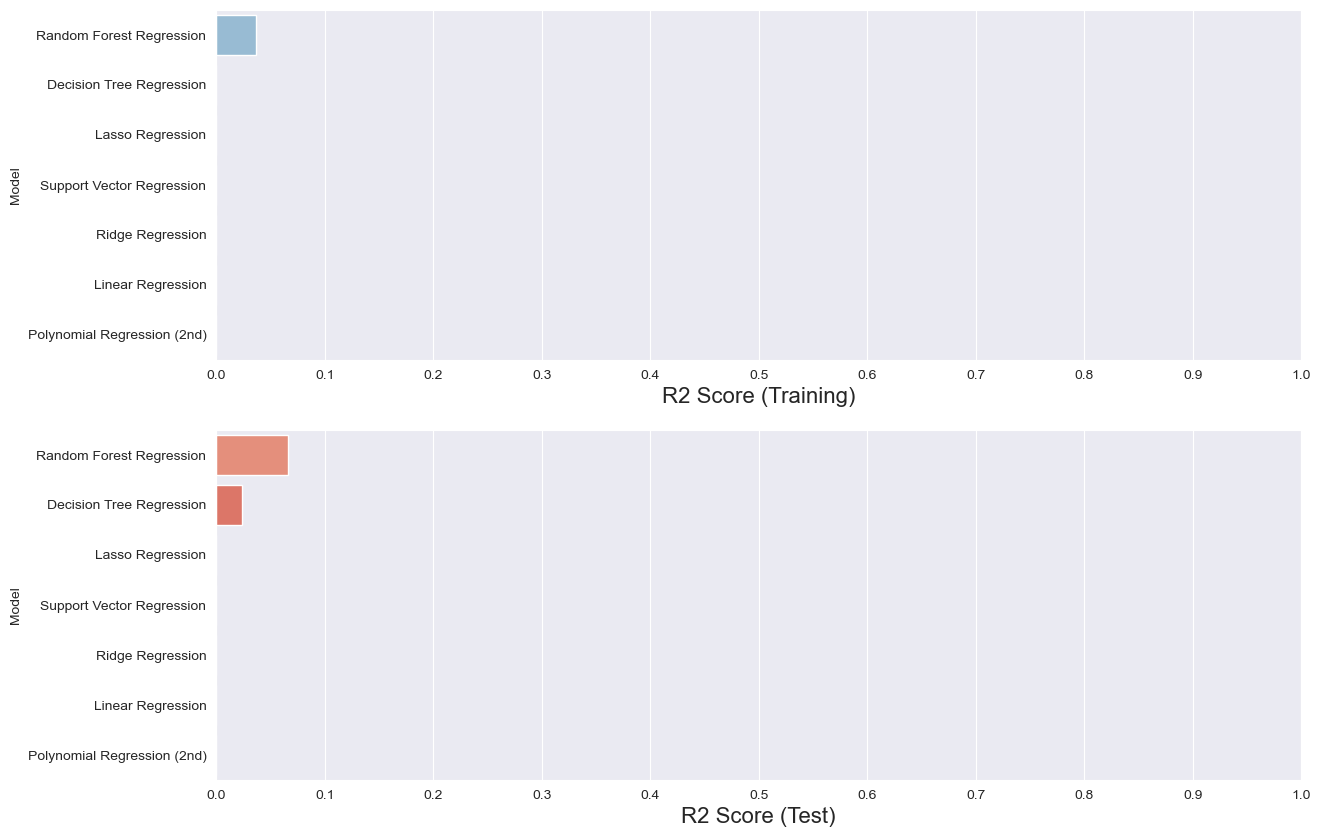

In [213]:
f, axes = plt.subplots(2,1, figsize=(14,10))
predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)
sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)
sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

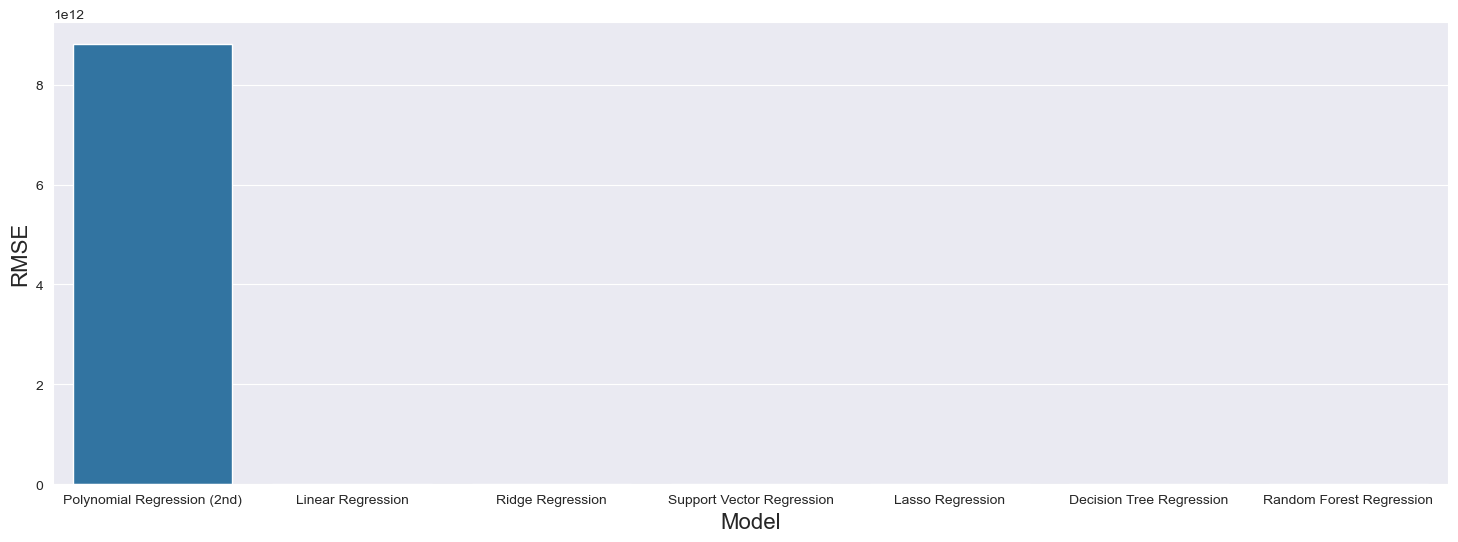

In [214]:
#Which model is better interms of RMSE? 
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)
f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)
plt.show()

In [215]:
"""Result :: In terms of Cross Validation scores the 
"LINEAR REGRESSION" provides higher accuracy.


Results : Male smokers incurred 11% more medical costs 
(after adjustment for age, physical functioning status, alcohol consumption, body mass
index and average time spent walking) than ‘never smokers’ 
but for female smokers and never smokers the costs were almost 
the same. This difference was mainly attributable to increased use of 
inpatient medical care among smokers, especially in males, where per 
month cost of inpatient care was 33% higher in smokers. 
Age-group specific analysis in men showed that excess mortality and 
excess medical cost ratio for smokers peaked in those aged 
60–69 years.


Conclusions : Smokers consume excess medical care. Among the 
population aged 45 years and over, about 4% of total medical costs 
were attributable to smoking. To pursue both better health and 
lower medical costs for the nation, a comprehensive programme to 
reduce tobacco use is needed.


KEY MESSAGES :
1. The impact of smoking on medical care use was examined in 
a 30-month prospective population-based cohort study in Japan 
(N = 43 408).
2. Male smokers incurred 11% more medical costs than 
‘never smokers’ but for female smokers and never smokers the costs 
were almost the same.
3. This difference was mainly attributable to the increased use 
of inpatient medical care among smokers, especially in males, 
where per month cost of inpatient care was 33% higher in smokers.

"""

'Result :: In terms of Cross Validation scores the \n"LINEAR REGRESSION" provides higher accuracy.\n\n\nResults : Male smokers incurred 11% more medical costs \n(after adjustment for age, physical functioning status, alcohol consumption, body mass\nindex and average time spent walking) than ‘never smokers’ \nbut for female smokers and never smokers the costs were almost \nthe same. This difference was mainly attributable to increased use of \ninpatient medical care among smokers, especially in males, where per \nmonth cost of inpatient care was 33% higher in smokers. \nAge-group specific analysis in men showed that excess mortality and \nexcess medical cost ratio for smokers peaked in those aged \n60–69 years.\n\n\nConclusions : Smokers consume excess medical care. Among the \npopulation aged 45 years and over, about 4% of total medical costs \nwere attributable to smoking. To pursue both better health and \nlower medical costs for the nation, a comprehensive programme to \nreduce toba

# Thank You.